# Code Example The World's Population in (Nov. 2022)

This dataset is from Kaggle

https://www.kaggle.com/datasets/ahmadjalalmasood123/world-population-dataset?resource=download&select=World+Population+%282022%29+.csv



In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import leafmap.foliumap as leafmap
import warnings
warnings.filterwarnings('ignore')

# Read in data from CSV

In [133]:
df = pd.read_csv('WorldPopulation2022.csv')
df.head()

,#,Country (or dependency),Population (2022),Yearly change,Net change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med.Age,Urban Pop %,World Share
0,1,China,"1,439,323,776",0.39%,"5,540,090",153,"9,388,211","-348,399",1.7,38,61%,18.47%
1,2,India,"1,380,004,385",0.99%,"13,586,631",464,"2,973,190","-532,687",2.2,28,35%,17.70%
2,3,United States,"331,002,651",0.59%,"1,937,734",36,"9,147,420","954,806",1.8,38,83%,4.25%
3,4,Indonesia,"273,523,615",1.07%,"2,898,047",151,"1,811,570","-98,955",2.3,30,56%,3.51%
4,5,Pakistan,"220,892,340",2.00%,"4,327,022",287,"770,880","-233,379",3.6,23,35%,2.83%


In [134]:
df.shape

(235, 12)

There are 235 rows and 12 columns (features)

## Exploratory Data Analysis

In [135]:
df = df.drop('#', axis=1)

In [136]:
df.head()

,Country (or dependency),Population (2022),Yearly change,Net change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med.Age,Urban Pop %,World Share
0,China,"1,439,323,776",0.39%,"5,540,090",153,"9,388,211","-348,399",1.7,38,61%,18.47%
1,India,"1,380,004,385",0.99%,"13,586,631",464,"2,973,190","-532,687",2.2,28,35%,17.70%
2,United States,"331,002,651",0.59%,"1,937,734",36,"9,147,420","954,806",1.8,38,83%,4.25%
3,Indonesia,"273,523,615",1.07%,"2,898,047",151,"1,811,570","-98,955",2.3,30,56%,3.51%
4,Pakistan,"220,892,340",2.00%,"4,327,022",287,"770,880","-233,379",3.6,23,35%,2.83%


In [137]:
df = df.rename(columns={'Country (or dependency)':'Country', 'Population (2022)':'Population', 'Med.Age': 'Median Age', 'Fert. Rate':'Fertility Rate', 'Migrants (net)': 'Migrants', 'Yearly change': 'Yearly change %', 'World Share':'World Share %'})
df.head()

,Country,Population,Yearly change %,Net change,Density (P/Km²),Land Area (Km²),Migrants,Fertility Rate,Median Age,Urban Pop %,World Share %
0,China,"1,439,323,776",0.39%,"5,540,090",153,"9,388,211","-348,399",1.7,38,61%,18.47%
1,India,"1,380,004,385",0.99%,"13,586,631",464,"2,973,190","-532,687",2.2,28,35%,17.70%
2,United States,"331,002,651",0.59%,"1,937,734",36,"9,147,420","954,806",1.8,38,83%,4.25%
3,Indonesia,"273,523,615",1.07%,"2,898,047",151,"1,811,570","-98,955",2.3,30,56%,3.51%
4,Pakistan,"220,892,340",2.00%,"4,327,022",287,"770,880","-233,379",3.6,23,35%,2.83%


In [138]:
df.dtypes

Country            object
Population         object
Yearly change %    object
Net change         object
Density (P/Km²)    object
Land Area (Km²)    object
Migrants           object
Fertility Rate     object
Median Age         object
Urban Pop %        object
World Share %      object
dtype: object

Not good, we need all these to be of type int (execpt for country name)

In [139]:
# df.loc[:,'Population':] = df.loc[:,'Population':].astype(float)

We see an error has occurred:

ValueError: could not convert string to float: '1,439,323,776'

In [140]:
df.replace(to_replace=',', value='', regex=True,  inplace=True)
df.head(3)

,Country,Population,Yearly change %,Net change,Density (P/Km²),Land Area (Km²),Migrants,Fertility Rate,Median Age,Urban Pop %,World Share %
0,China,1439323776,0.39%,5540090,153,9388211,-348399,1.7,38,61%,18.47%
1,India,1380004385,0.99%,13586631,464,2973190,-532687,2.2,28,35%,17.70%
2,United States,331002651,0.59%,1937734,36,9147420,954806,1.8,38,83%,4.25%


In [141]:
df.replace(to_replace='%', value='', regex=True,  inplace=True)
df.head()

,Country,Population,Yearly change %,Net change,Density (P/Km²),Land Area (Km²),Migrants,Fertility Rate,Median Age,Urban Pop %,World Share %
0,China,1439323776,0.39,5540090,153,9388211,-348399,1.7,38,61,18.47
1,India,1380004385,0.99,13586631,464,2973190,-532687,2.2,28,35,17.70
2,United States,331002651,0.59,1937734,36,9147420,954806,1.8,38,83,4.25
3,Indonesia,273523615,1.07,2898047,151,1811570,-98955,2.3,30,56,3.51
4,Pakistan,220892340,2.00,4327022,287,770880,-233379,3.6,23,35,2.83


In [142]:
df.tail()

,Country,Population,Yearly change %,Net change,Density (P/Km²),Land Area (Km²),Migrants,Fertility Rate,Median Age,Urban Pop %,World Share %
230,Montserrat,4992,0.06,3,50,100,NaN,N.A.,N.A.,10,0.00
231,Falkland Islands,3480,3.05,103,0,12170,NaN,N.A.,N.A.,66,0.00
232,Niue,1626,0.68,11,6,260,NaN,N.A.,N.A.,46,0.00
233,Tokelau,1357,1.27,17,136,10,NaN,N.A.,N.A.,0,0.00
234,Holy See,801,0.25,2,2003,0,NaN,N.A.,N.A.,N.A.,0.00


In [143]:
df.replace(to_replace='N.A.', value=np.nan, regex=True,  inplace=True)
df.tail()

,Country,Population,Yearly change %,Net change,Density (P/Km²),Land Area (Km²),Migrants,Fertility Rate,Median Age,Urban Pop %,World Share %
230,Montserrat,4992,0.06,3,50,100,NaN,NaN,NaN,10,0.00
231,Falkland Islands,3480,3.05,103,0,12170,NaN,NaN,NaN,66,0.00
232,Niue,1626,0.68,11,6,260,NaN,NaN,NaN,46,0.00
233,Tokelau,1357,1.27,17,136,10,NaN,NaN,NaN,0,0.00
234,Holy See,801,0.25,2,2003,0,NaN,NaN,NaN,NaN,0.00


In [144]:
df.dtypes

Country            object
Population         object
Yearly change %    object
Net change         object
Density (P/Km²)    object
Land Area (Km²)    object
Migrants           object
Fertility Rate     object
Median Age         object
Urban Pop %        object
World Share %      object
dtype: object

In [145]:
numeric_subset = df.loc[:, ~df.columns.isin(['Country', 'Fertility Rate', 'Yearly change %', 'Urban Pop %', 'World Share %'])]
numeric_subset = numeric_subset.astype('Int64')
df[numeric_subset.columns] = numeric_subset
df.dtypes

Country            object
Population          Int64
Yearly change %    object
Net change          Int64
Density (P/Km²)     Int64
Land Area (Km²)     Int64
Migrants            Int64
Fertility Rate     object
Median Age          Int64
Urban Pop %        object
World Share %      object
dtype: object

In [146]:
float_subset = df.loc[:, df.columns.isin(['Yearly change %', 'Fertility Rate', 'Urban Pop %', 'World Share %'])]
float_subset = float_subset.astype(float)
df[float_subset.columns] = float_subset
df.dtypes

Country             object
Population           Int64
Yearly change %    float64
Net change           Int64
Density (P/Km²)      Int64
Land Area (Km²)      Int64
Migrants             Int64
Fertility Rate     float64
Median Age           Int64
Urban Pop %        float64
World Share %      float64
dtype: object

In [147]:
df.isnull().sum()

Country             0
Population          0
Yearly change %     0
Net change          0
Density (P/Km²)     0
Land Area (Km²)     0
Migrants           34
Fertility Rate     34
Median Age         34
Urban Pop %        13
World Share %       0
dtype: int64

229,Saint Helena,"6,077",0.30%,18,16,390,,N.A.,N.A.,27%,0.00%

I am unsure of why they decided to use N.A. as a na category type
when both pandas and numpy have na specific types

either pd.NA or np.nan
* the np.nan is actually of type float

# Feature Engineering & Visualizations

What questions would we like to ask about the data?

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

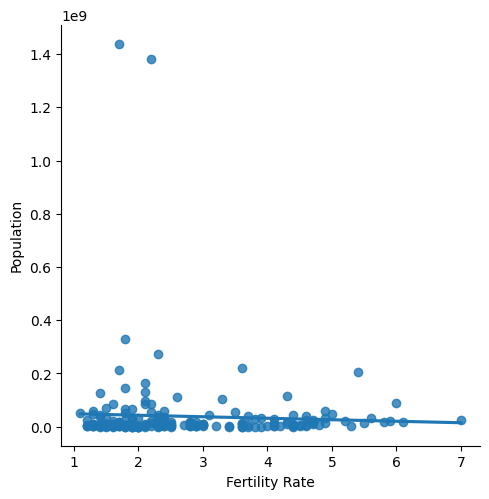

In [153]:
sns.lmplot(data=df, x='Fertility Rate', y='Population')

In [160]:
m = leafmap.folium.Map(location=[40, -100], zoom=4)
m

TypeError: folium.utilities.parse_options() got multiple values for keyword argument 'zoom'